# Volume 4: Numerical Methods for IVPs
    Daniel Perkins
    MATH 437
    9/8/24

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [38]:
def euler(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    xi = x0
    approximation = [x0]
    h = t[1] - t[0]  # Step size
    for ti in t[1:]:  # Skip first one since it is already included
        xi = xi + h*f(xi, ti)  # Euler's formilat
        approximation.append(xi)
    return np.array(approximation)
    

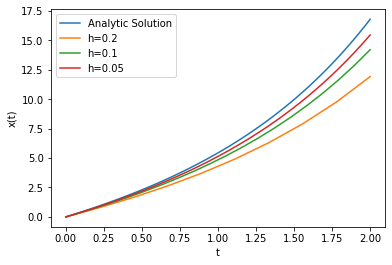

In [39]:
t = np.linspace(0,2,100)
x = -2 + 2*t + 2*np.exp(t)
def x_prime(x, t):  # Define the function
    return x - 2*t + 4
x0 = 0

plt.plot(t, x, label="Analytic Solution")
plt.plot(np.linspace(0,2,10), euler(x_prime, x0, np.linspace(0,2,10)), label="h=0.2")  # Step size is (2-0)/10=.2
plt.plot(np.linspace(0,2,20), euler(x_prime, x0, np.linspace(0,2,20)), label="h=0.1")
plt.plot(np.linspace(0,2,40), euler(x_prime, x0, np.linspace(0,2,40)), label="h=0.05")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [ ]:
def midpoint(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    raise NotImplementedError("Problem 2 Incomplete")

def rk4(f, x0, t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    raise NotImplementedError("Problem 2 Incomplete")

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

for $m = 1$ and $k = 1$. Compare this with the numerical approximation when $m = 3$ and $k =1$.

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 

\begin{align*}
2y'' + \gamma y' + 2y &= 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
y(0) &= 2,\\
y'(0) &= -1
\end{align*}

For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.